In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# construct the continuous model in the numerical domain
#  t-----> n*dt 

In [3]:
steps=50
dt=5/steps
theta0=5/180*np.pi
omega0=0
x0=np.array([theta0,omega0])
g=9.8
l=1
omega=np.sqrt(g/l)

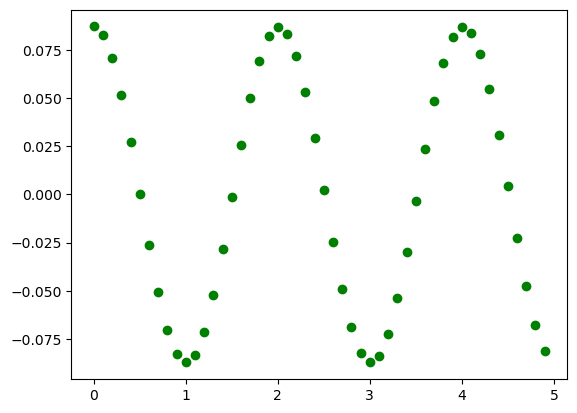

In [4]:
# True values from physics

t=dt*np.arange(steps)
y=theta0*np.cos(omega*t)
plt.plot(t,y,'go')

In [5]:
def f(x):        # f(x)=dx/dt
    theta,omega=x
    d_theda=omega
    d_omega=-g/l*theta
    return np.array([d_theda,d_omega])

In [6]:
# Euler's method
X_E=np.zeros((steps,len(x0)))
x=x0.copy()
for i in range(steps):
    X_E[i]=x.copy()
    x=x+f(x)*dt

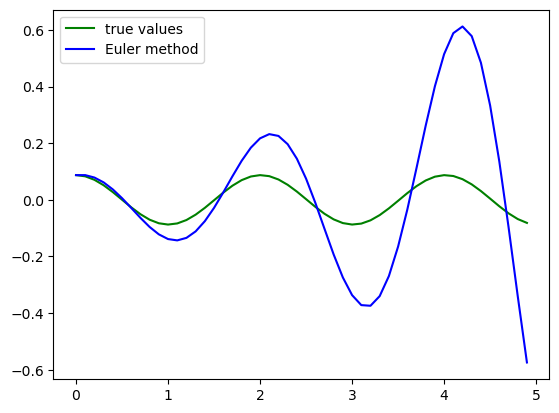

In [7]:
plt.plot(t,y,'g-')
plt.plot(t,X_E[:,0],'b-')
plt.legend(['true values','Euler method'])

In [8]:
def rk4(f,x):
    k1=dt*f(x)
    k2=dt*f(x+k1/2)
    k3=dt*f(x+k2/2)
    k4=dt*f(x+k3)
    k=(k1+2*k2+2*k3+k4)/6
    return k

In [9]:
# RK4 method
X_RK4=np.zeros((steps,len(x0)))
x=x0.copy()
for i in range(steps):
    X_RK4[i]=x.copy()
    x=x+rk4(f,x)

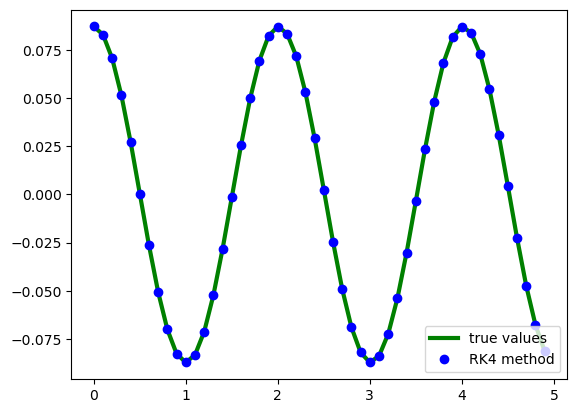

In [11]:
plt.plot(t,y,'g-',lw=3)
plt.plot(t,X_RK4[:,0],'bo')
plt.legend(['true values','RK4 method'])